In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd

In [13]:
data = pd.read_csv('C:/Users/khanh/Desktop/ML-git/CHAPTER 2/Practice2_Chapter2.csv')

X = data[['TV', 'Radio', 'Newspaper']].values
Y = data['Sales'].values

theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0
alpha = 0.00001 
iterations = 1000 

In [14]:
# h function
def h(X, theta0, theta1, theta2, theta3):
    return theta0 + theta1 * X[:, 0] + theta2 * X[:, 1] + theta3 * X[:, 2]

# Cost function
def cost(X, Y, theta0, theta1, theta2, theta3):
    m = len(Y)
    return 1/(2*m) * np.sum((h(X, theta0, theta1, theta2, theta3) - Y)**2)

# Gradient descent 
def gradient_descent(X, Y, theta0, theta1, theta2, theta3, alpha, iterations):
    m = len(Y)
    
    for i in range(iterations):
        grad0 = (1/m) * np.sum(h(X, theta0, theta1, theta2, theta3) - Y)
        grad1 = (1/m) * np.sum((h(X, theta0, theta1, theta2, theta3) - Y) * X[:, 0])
        grad2 = (1/m) * np.sum((h(X, theta0, theta1, theta2, theta3) - Y) * X[:, 1])
        grad3 = (1/m) * np.sum((h(X, theta0, theta1, theta2, theta3) - Y) * X[:, 2])
        
        theta0 -= alpha * grad0
        theta1 -= alpha * grad1
        theta2 -= alpha * grad2
        theta3 -= alpha * grad3

    return theta0, theta1, theta2, theta3

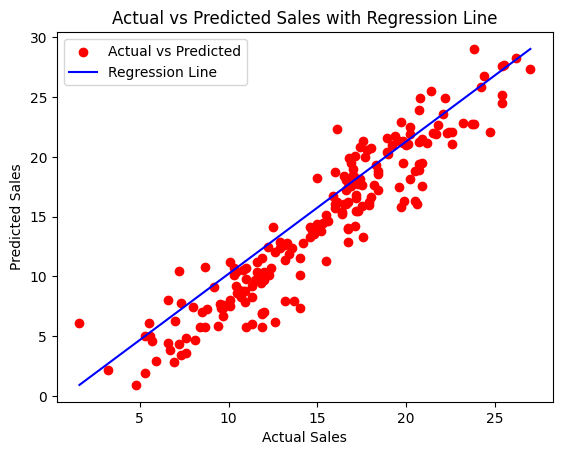

In [15]:
theta0, theta1, theta2, theta3 = gradient_descent(X, Y, theta0, theta1, theta2, theta3, alpha, iterations)

predicted_sales = h(X, theta0, theta1, theta2, theta3)

plt.scatter(Y, predicted_sales, color='red', label='Actual vs Predicted')
plt.plot([min(Y), max(Y)], [min(predicted_sales), max(predicted_sales)], color='blue', label='Regression Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales with Regression Line')
plt.legend()

plt.show()

In [18]:
itv = 150
iradio = 20
inewspaper = 30
pred = theta0 + theta1 * itv + theta2 * iradio + theta3 * inewspaper

print(f"Dự đoán doanh thu cho TV = {itv}$, Radio = {iradio}$, Newspaper = {inewspaper}$ => sales = {pred:.0f}$")

Dự đoán doanh thu cho TV = 150$, Radio = 20$, Newspaper = 30$ => sales = 14$
